In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


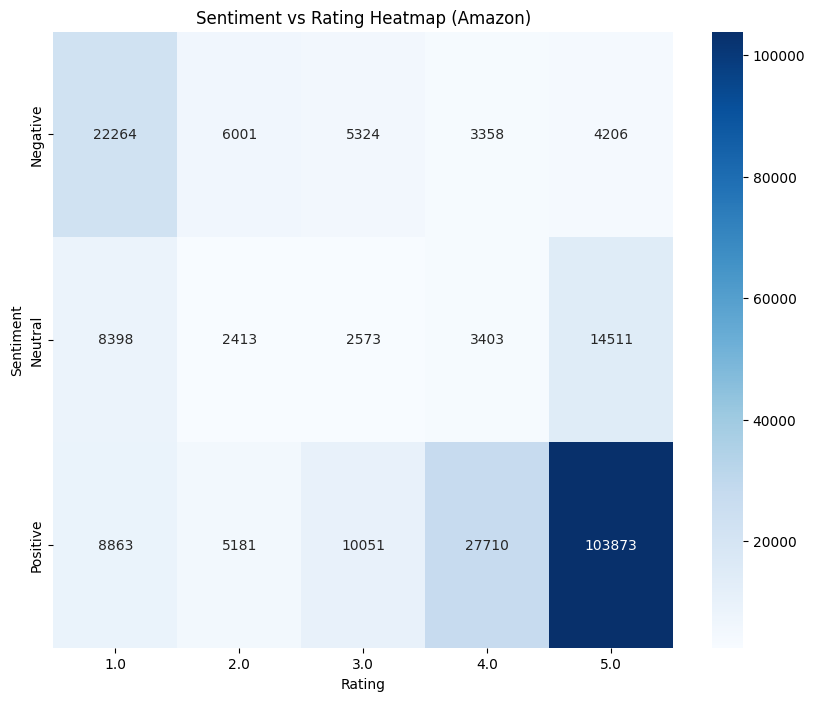

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df_amazon = pd.read_csv('/content/drive/MyDrive/amazon_processed_output.csv')

# Convert 'Rating' column to numeric, ignoring errors
df_amazon['Rating'] = pd.to_numeric(df_amazon['Rating'], errors='coerce', downcast='integer')

# Remove rows with non-integer ratings and ratings outside the range 1-5
valid_ratings = [1, 2, 3, 4, 5]
df_amazon = df_amazon[df_amazon['Rating'].isin(valid_ratings)]

# Create a pivot table with sentiment as rows and rating as columns
pivot_table_amazon = df_amazon.pivot_table(index='Output', columns='Rating', values='Product Name', aggfunc='count', fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_amazon, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.title('Sentiment vs Rating Heatmap (Amazon)')
plt.show()
